[1.  1.5 2.  2.5 3. ]
De Sitter Bound Lowest 0.03198887409651283
Delta phi: 0.016531443408703595
De Sitter Bound Lowest 0.034536807974269286
Delta phi: 0.02040467768748791
De Sitter Bound Lowest 0.03457496232575025
Delta phi: 0.02149956440409993
De Sitter Bound Lowest 0.03458046413625135
Delta phi: 0.02194242190550605
De Sitter Bound Lowest 0.03458046413625135
Delta phi: 0.022158286820791184
De Sitter Bound Lowest 0.11328914968450196
Delta phi: 0.04501630969438248
De Sitter Bound Lowest 0.19766646507647062
Delta phi: 0.0687559251310001
De Sitter Bound Lowest 0.21008644765109669
Delta phi: 0.08213968438623541
De Sitter Bound Lowest 0.21195418443480932
Delta phi: 0.09141884061259775
De Sitter Bound Lowest 0.21235702473807225
Delta phi: 0.09839166282139984
De Sitter Bound Lowest 0.2675747213864933
Delta phi: 0.0904335227334144
De Sitter Bound Lowest 0.7207143671903924
Delta phi: 0.15457921438299213
De Sitter Bound Lowest 1.0003167522986323
Delta phi: 0.19685175925611315
De Sitter Bound Lo

No handles with labels found to put in legend.


De Sitter Bound Lowest 11.345455591818235
Delta phi: 0.8155773287831802


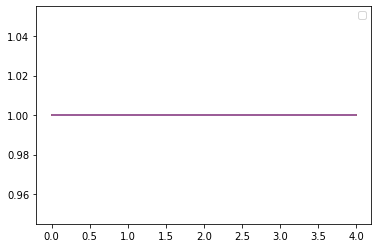

In [8]:
from stability_class import MultiFieldDarkEnergy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

params = {
    'Omega_M_0': 0.3,
    'Omega_R_0': 6e-5,
    'V0': 2.186,
    'm': 10,
    'r0': 7*1e-4,
    'alpha': 2/2.186*1e-3,
    'x_p_init': 1e-6,
    'x_t_init': 1e-6,
    'y_1_init': 1e-6,
    'p': 3,
    'r_init_multiplier': 1,
    'cosmo_constant': 0,
}

cur_time = Polygon([(-1.05, 0.65), (-0.95, 0.75), (-0.95, 0.65), (-1.05, 0.75)])

bins = 5
list_accepted = np.zeros((bins, bins))
p_range = np.linspace(1, 3, bins)
print(p_range)
m_range = np.linspace(10, 100, bins)
colors = ['red', 'blue']
plt.figure()
for i, p in enumerate(p_range):
    for j, m in enumerate(m_range):
        params['p'] = p
        params['m'] = m
        c = MultiFieldDarkEnergy(metric='r_p', potential='exp_spinning', params=params, N_min = 0, N_max = 10, gamma=1)
        c.run_background_eq_of_motion()
        #c.plot_swampland_bound()
        print('De Sitter Bound Lowest', min(c.get_de_sitter_bound()))
        field_derivative, delta_phi = c.get_field_derivative()
        print('Delta phi:', delta_phi)
        size = len(c.get_eq_of_state())
        w = c.get_eq_of_state()
        omega = c.get_omega_phi()

        cur_param = 1
        for k in range(size):
            point = Point(w[k], omega[k])
            if cur_time.contains(point):
                break
            if k == size:
                cur_param=0
        list_accepted[i, j] = cur_param


plt.plot(list_accepted)
plt.legend()
#plt.savefig('img/exp_spinning_p_-2_y1_10-5.pdf', bbox_inches = 'tight')

plt.show()